### Preparation 

For this homework you will use sigmoid as an activation function. Think about the following questions (you do not have to hand in the answers, they are just for your own recap)

- What is the purpose of an activation function in a NN in general?

- What's the advantage of e.g. sigmoid over the step function (threshold function)?

- How does sigmoid look like (the formula as well as the graph)?

- What is the derivative of sigmoid?

Implement a function sigmoid ( $\mathrm{x}$ ) and a function sigmoidprime ( $\mathrm{x}$ ) (the derivative. 

In [10]:
import numpy as np

import matplotlib.pyplot as plt

### Implementing the activation functions 

In [60]:
def sigmoid(x):
    """Function implements the sigmoid function
        Args:
            x (ndarray): Ndarray of values on which sigmoid should be applied
        Returns:
            sig (ndarray): Ndarray of resulting values
    """
    sig = 1 / (1 + np.exp(-x))
    return sig

In [61]:
def sigmoidprime(x):
    """Function implements the derivative of a sigmoid function and expects a numpy array as argument
        Args:
            x (ndarray): Ndarray of values on which the sigmoid derivative should be applied
        Returns:
            ds (ndarray): Ndarray of resulting values
    """
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

### data set and target values

The training data set will consist of possible inputs and their corresponding labels. We are training the network on logical gates (and, or, not and, not or, xor $==$ exclusive or). We will create the inputs and labels ourselves.

What are possible inputs to the logical gates?

For each of the logical gates you will need an array of labels $(=$ the true solution that the network is supposed to output), one corresponding to each input pair. ${ }^{2}$

${ }^{1}$ The logical gates take as input two binary digits (either 1 or 0 ), with all possible combinations there should be 4 input pairs. Put them in a $2 \mathrm{D}$ numpy array. (The shape of the array should be $(4,2))$

${ }^{2}$ You will need 5 arrays for each type of gate containing 4 binary digits $(0$ or 1 corresponding to the input)


In [62]:
# inputs
logical_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

# targeted results
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

## Perceptron class

Our multilayer-Perceptron will consist of single Perceptrons. So we will need a class Perceptron.

Think about what a Perceptron consists of. ${ }^{3}$

When you create a Perceptron, it should receive an integer argument called input_units specifying how many weights are coming in to your Perceptron. In the beginning, random values should be assigned to the weights and the bias. ${ }^{4}$ Also assign the learning rate alpha $=1 .{ }^{5}$

The Perceptron should have a function forward_step(self, inputs) that calculates the activation of the perceptron. Use sigmoid as activation function.

Then you'll need a function update (self, delta) which updates the parameters. To do so, compute the gradients for weights and bias from the error term $\delta$. (This error term will be passed to the function when the backpropagation of the parent class MLP() is called - see next section.

Compute the gradients using:

$$
\frac{\partial L}{\partial w_{i j}^{(l)}}=\delta_{i}^{(l)} a_{j}^{(l-1)}
$$

And then update the parameters using:

$$
\theta_{\text {new }}=\theta_{\text {old }}-\alpha \nabla L_{\theta}
$$

${ }^{3}$ weights and a bias

${ }^{4}$ you can use np.random.randn() for that

${ }^{5}$ All of this happens in the _init_. function. Make sure you define weights, bias, alpha with self. in the beginning so they can be accessed in all functions of the class.



In [70]:
class Perceptron:
    """Single neuron handling its own weights and bias.
        Instance Attributes:
            weights (ndarray): weights coming into the perceptron
            bias (float): additional bias weight
            alpha (int): Learning rate
        Methods:
            __init__(self, input_units): Class constructor
            forward_step(self, inputs): Calculates activation of the neuron
            update(self, delta): Updates the weights
    """
    def __init__(self, input_units):
        """Initialize a new neuron with its weights and bias.
            Args:
                input_units (int): Dimensionality of the data coming into this perceptron.
                    In a network of perceptrons this basically represents the
                    number of neurons in the layer before this neuron's layer or basically how many weights are coming in.
                    Used for generating the perceptron's weights vector, which not only includes one weight per input
                    but also an additional bias weight.
        """
        # initializing as many random weights as given input_units 
        self.weights = np.random.randn(input_units)
        
        # its a single perceptron, so should have a single random bias. 
        self.bias = np.random.randn()
        
        # learning rate
        self.alpha = 1
        
    def forward_step(self, inputs):
        """Function calculates the activation of the perceptron using sigmoid as activation function on the weighted sum.
        Weighted sum is calculateed from the dot product of input and weights plus the bias.
            Args:
                self: gain access to all weights (and the bias) and the learning rate
                inputs (ndarray): gathers all inputs
            Returns:
                float between 0 and 1 for the activation
        """
        # gather the input
        self.input = inputs
        
        # calculates the weighted sum after: weight = ( W dot X + b )  
        self.weighted_sum = self.weights @ self.input  + self.bias 
        
        # puts it through activation function sigma(weight) and returns the output
        return sigmoid(self.weighted_sum)
    
    
    def update(self, delta):
        """ Computes the gradient for weights and bias from the error term delta, then updates the neurons weights accordingly.
            Args:
                self: gain access to all weights (and the bias) and the learning rate
                delta (float): Error value passed during backpropagation
        """
        # calculation of the gradient (▽ L) = delta_of_next_neuron * output_of_corresponding_neuron 
        gradient =  delta * self.input
        
        # updating the weights according to the learning rate and calculated gradient
        self.weights -= self.alpha * gradient

## MLP

Further, we will need a class MLP() that can perform a forward and backprop-step. Initialize the MLP with $\mathbf{1}$ hidden layer that has $\mathbf{4}$ Perceptrons. Initialize $\mathbf{1}$ output neuron$ { }^{7}$. Define the following functions of the class:

- In the forward_step the inputs are passed through the network. ${ }^{8}$

- In the backprop_step the parameters of the network are updated. ${ }^{9}$


${ }^{7}$ It might make sense to also initialize a variable self. output to store the output.

${ }^{8}$ First compute the activations for the hidden layer. (You might need to reshape the resulting array to feed it to the output neuron. Check np.reshape (arr, newshape $=(-1))$.)

Then feed the activations of the hidden laver into the output laver. Store it in self. output.

${ }^{9}$ That means, update the weights and the biases of the output neuron (first) and neurons in the hidden layers (afterwards). For that, first compute the error term $\delta$ using this formula:

$$
\delta_{i}^{(l)}=\left\{-\left(t_{i}-y_{i}\right) \sigma^{\prime}\left(d_{i}^{(N)}\right) \text { if } l=N,\left(\sum_{k=1}^{m} \delta_{k}^{(l+1)} w_{k i}^{(+1)}\right) \sigma^{\prime}\left(d_{i}^{(l)}\right)\right. \text { else. }
$$

Then call the update (self, delta) function of the respective neuron and hand the delta over.

(This is just a suggestion, there might be different solutions.)


In [68]:
class MLP():
    """ Network of multiple perceptron layers.
        Instance attributes:
            h_layer (list of instances of Perceptron): hidden layer of the MLP
            out_neuron (instance of Perceptron): output neuron
            output (int): stores output of a layer (default 0)
        Methods:
            __init__(self): Class constructor
            forward_step(self, inputs): Performs a forward step
            backprop_step(self, inputs, target): Performs backpropagation step
    """
    def __init__(self):
        """Initialize a new network, made up of individual perceptron layers."""
        # initialize 1 hidden layer with 4 perceptrons
        self.h_layer = [Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)]
        
        # initialize the output neuron 4 types of combination 
        self.out_neuron = Perceptron(4)
        
        # initialize a variable self.output to store the output
        self.output = 0
    
    def forward_step(self, inputs):
        """Performs a forward step: Computes activation of all neurons in the layer and feeds them to the output.
            Args:
                self: gain access to the layers of the MLP
                inputs (ndarray): Input to the layer
        """
        # create an empty list
        activations = []
        
        # compute the activation for every neuron in hidden layer iteratively
        for perceptron in self.h_layer:
            # calls the forward step for each neuron (activation)
            collect_activation = perceptron.forward_step(inputs)
            # stores activation in a list
            activations.append(collect_activation)
        
        # convert the activations list into an array and reshapes it to a single vector
        activations = np.reshape(np.array(activations), newshape = (-1))
        
        # recall function for the output layer with the activation vector as new input to get final output
        self.output = self.out_neuron.forward_step(activations)
        
    
    def backprop_step(self, inputs, target):
        """Performs a backpropagation step where it calculates the error rate delta for each perceptron
        and adapts the weights by calling on Perceptron.update()
            self: gain access to the layers of the MLP
            inputs (ndarray): takes inputs to the MLP
            target (ndarray): target values
        """
        ## Step 1: backpropagation on the output neurons (layer == N) 
        
        # calculate the error rate delta for the output neuron
        # formula: delta(output) = (output - target value) * sigmoid'(weighted sum)
        delta_output = (self.output - target) * sigmoidprime(self.out_neuron.weighted_sum)
        
        # update the weights with the calculated error rate
        self.out_neuron.update(delta_output)
        
        
        ## Step 2: hidden neurons

        # creating empty list for storing the delta values of the hidden layer
        delta_hidden = []
        
        # for each perceptron in the hidden layer apply
        # formula: delta(hidden) = delta_j * sigmoid'(weighted sum) * sum_of_weights
        for index, perceptron in enumerate(self.h_layer):
            # compute the delta value and add it to the list (first itter = calculate the output neurons delta) 
            collect_delta = delta_output * sigmoidprime(perceptron.weighted_sum) * self.out_neuron.weights[index]
            delta_hidden.append(collect_delta)
            # update the weights for the next backward neuron
            perceptron.update(delta_hidden[index])

## Training

As a loss function for training, we will use the squared error $(t-y)^{2}$. This loss is the sigmoid output vs. the target (=label in dataset). But as discussed in the lecture, we want to introduce an additional measurement of the performance of the network: This is the accuracy measure. While the loss compares the distance of our network to the ground truth, the accuracy makes a less qualitative statement about the performance of our network, but quantitatively tells us how our network is doing. To do so, we introduce a threshold, in our case we use $0.5$ and define that if the network outputs a value bigger than $0.5$ and the target is 1 , it counts as a correct classification. If target is 0 a correct classification will be a value smaller than $0.5$ respectively. The accuaracy is then defined as the ratio of correct classification vs total classifications performed

The training procedure thus should consist of the following steps:

1. Create an instance of an MLP class.

2. Train the instance for 1000 epochs.

a) In each epoch, loop over each point in your dataset once.

i. For each data point, perform a forward and a backward step.

ii. Record the accuracy and the loss for each point.

For the purpose of visualization and also to monitor the performance of your network, you should keep track of the epochs and the average loss and accuracy for each epoch.

In [71]:
#instance of the MLP class
mlp = MLP()

# initialize lists to store performance and declare threshold and epochs to train to
accuracies = []
losses = []
epochs = []
threshold = 0.5
epoch = 1000

for index in range(epoch):
    # keep track of the steps and start all tracking at 0
    epochs.append(index)
    my_accuracy = 0
    my_loss = 0
    
    # iterate over the inputs and corresponding target values
    for number in range(4):
        input = logical_inputs[number]
        target = t_xor[number]

        mlp.forward_step(input)
        mlp.backprop_step(input, target)

        # checking if the output and target values match
        my_accuracy += int(int(mlp.output >= threshold) == target)

        # calculate the loss with the squared error = (t-y)^2
        my_loss += (target - mlp.output) ** 2

    accuracy = my_accuracy/4
    accuracies.append(accuracy)
    losses.append(my_loss/4)

## Visualization

  Visualize the training progress using matplotlib. Create one graph with the epochs on the $x$-axis and the average loss per epoch on the $y$-axis. Do the same for the average accuracy per epoch.

If your MLP trained correctly, the loss should come down to zero and the accuracy should go up to 1 in most cases. Due to random weight initialization the accuracy might not reach 1 sometimes. In that case just rerun the MLP initialization and the training. 

Text(0, 0.5, 'loss')

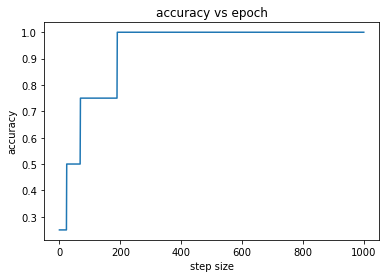

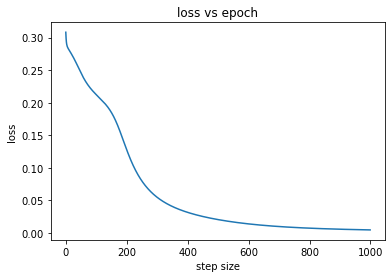

In [73]:
plt.figure()

# plot the accuracy vs the epoch
plt.title("accuracy vs epoch")
plt.plot(epochs,accuracies)
plt.xlabel("step size")
plt.ylabel("accuracy")

# plot the loss vs the epoch
plt.figure()

plt.title("loss vs epoch")
plt.plot(epochs,losses)
plt.xlabel("step size")
plt.ylabel("loss")